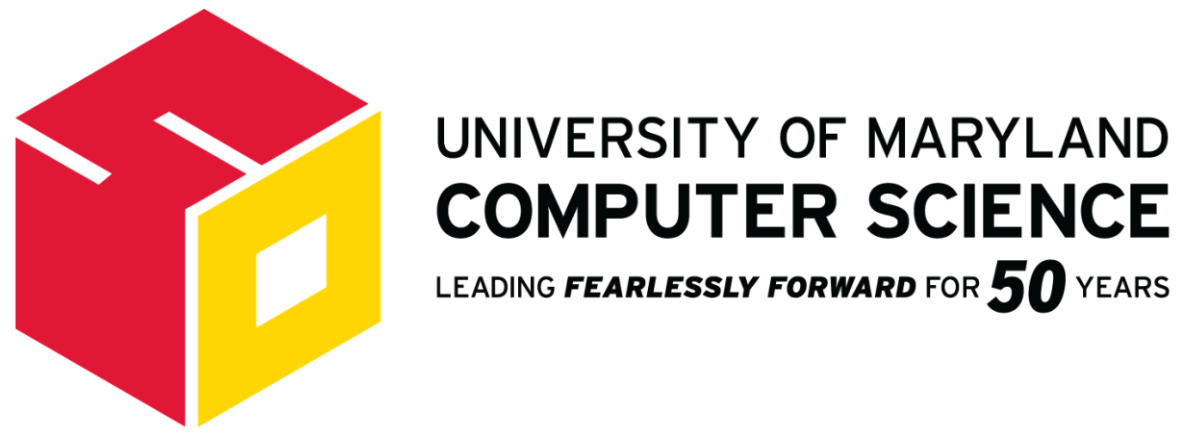

# Summary of HW5: Main Points

Over the course of the following homework you'll walk through a guided tutorial on **Regression** and its uses.

* We'll start with looking at regression on different relations in data (linear, quadratic, etc.).

* Then you'll work on building your own regression tool.

* You'll finish the homework by tying the ideas of these different relations (linear, quadratic) into neural networks to understand **why** we use neural networks.

### Section 1 : Basic Linear Regression (15 points)

Let's begin with **some straightforward linear regression** on some basic datasets. Take a look at the data we are using below.

##### Dataset Preparation (DO NOT MODIFY!)
Below is the essential code for preparing our dataset for analysis. **Please do not alter this code**. Instead, observe and understand the steps being taken.

Once our dataset is ready, we will proceed to train our linear regression model and evaluate how well it explains the data.

The dataset includes:

- (1) "linear" : A linear dataset
- (2) "convex" : second-order polynomial Dataset
- (3) "trigonometric" : high-order trigonometric Dataset


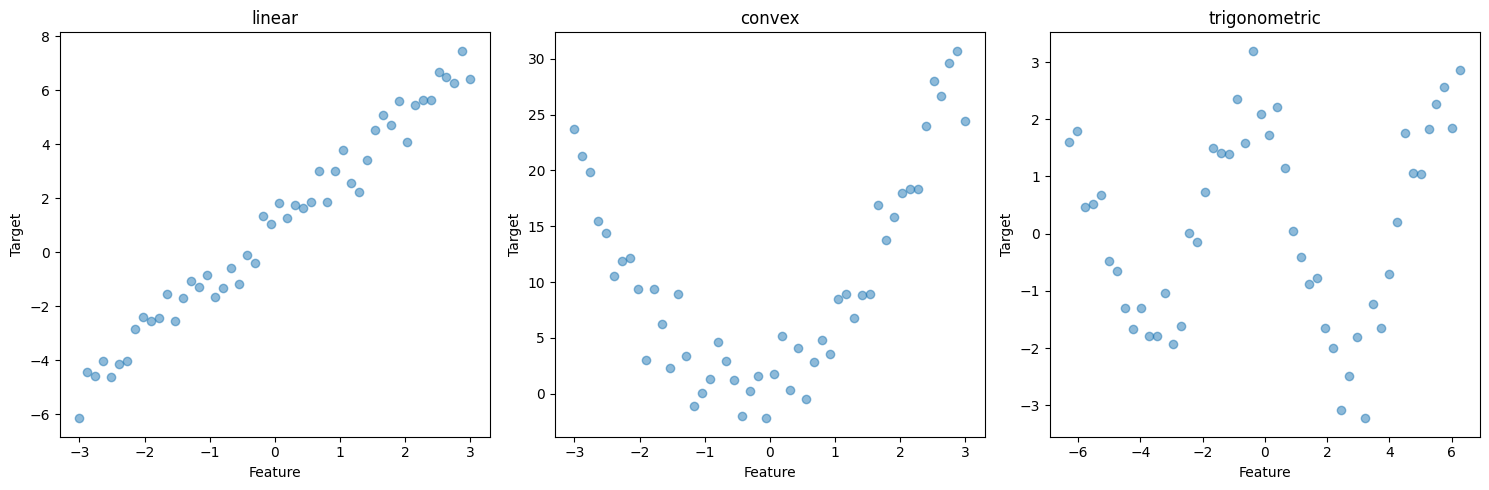

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


### DO NOT MODIFY
def generate_polynomial_dataset(weights, n_samples=100, noise_level=0.1):
    """Generate a polynomial dataset."""
    X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
    y = np.zeros(n_samples)
    for i, weight in enumerate(weights):
        y += weight * (X ** i).flatten()
    y += np.random.normal(0, noise_level, size=n_samples)  # Adding noise

    return X, y

def generate_trigonometric_dataset(w_c, w_s, n_samples=100, noise_level=0.1):
    """Generate a trigonometric dataset."""
    X = np.linspace(-2 * np.pi, 2 * np.pi, n_samples).reshape(-1, 1)
    y = w_c * np.cos(X).flatten() + w_s * np.sin(X).flatten()
    y += np.random.normal(0, noise_level, size=n_samples)  # Adding noise

    return X, y

datasets = {
    "linear": generate_polynomial_dataset([1, 2], 50, 0.5),
    "convex": generate_polynomial_dataset([1, 2, 3], 50, 2.5),
    "trigonometric": generate_trigonometric_dataset(2, -1, 50, 0.5)
}


# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each dataset
for ax, dataset in zip(axes, datasets.items()):
    title, (X, y) = dataset
    ax.scatter(X, y, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

plt.tight_layout()
plt.show()
### DO NOT MODIFY

Above, we visualize these datasets for you to gather some ideas about how they look. Look at the visualizations and consider: What are your thoughts on using linear regression to model the non-linear patterns observed in the convex and trigonometric datasets? Do you believe linear regression is adaptable enough to accurately capture these complex relationships? (THIS IS NOT A TASK, JUST A WARM-UP for your thought process before you start working on your tasks next)

##### 1.1. Preparation of Training and Testing Sets (2 pts)

TASK: We will now **divide our three datasets into training and testing sets**.

For this task, you might want utilize the *train_test_split* function from *sklearn*. This step is crucial for preparing our data for the upcoming linear regression modeling, ensuring that we have separate sets for training our models and evaluating their performance.


In [ ]:
from sklearn.model_selection import train_test_split

# Our datasets
X_linear, Y_linear = datasets["linear"]
X_convex, Y_convex = datasets["convex"]
X_tri, Y_tri = datasets["trigonometric"]

random_state = 42
np.random.seed(random_state)

##### Instruction: You have to define X_*_train, X_*_test, Y_*_train and Y_*_test for each (X,y) pair
##### Your Code Below
X_linear_train, X_linear_test, Y_linear_train, Y_linear_test = train_test_split(X_linear, Y_linear, random_state=random_state)
X_convex_train, X_convex_test, Y_convex_train, Y_convex_test = train_test_split(X_convex, Y_convex, random_state=random_state)
X_tri_train, X_tri_test, Y_tri_train, Y_tri_test = train_test_split(X_tri, Y_tri, random_state=random_state)


Now, let's **visualize our split dataset**. You can just use the below functions to plot them.

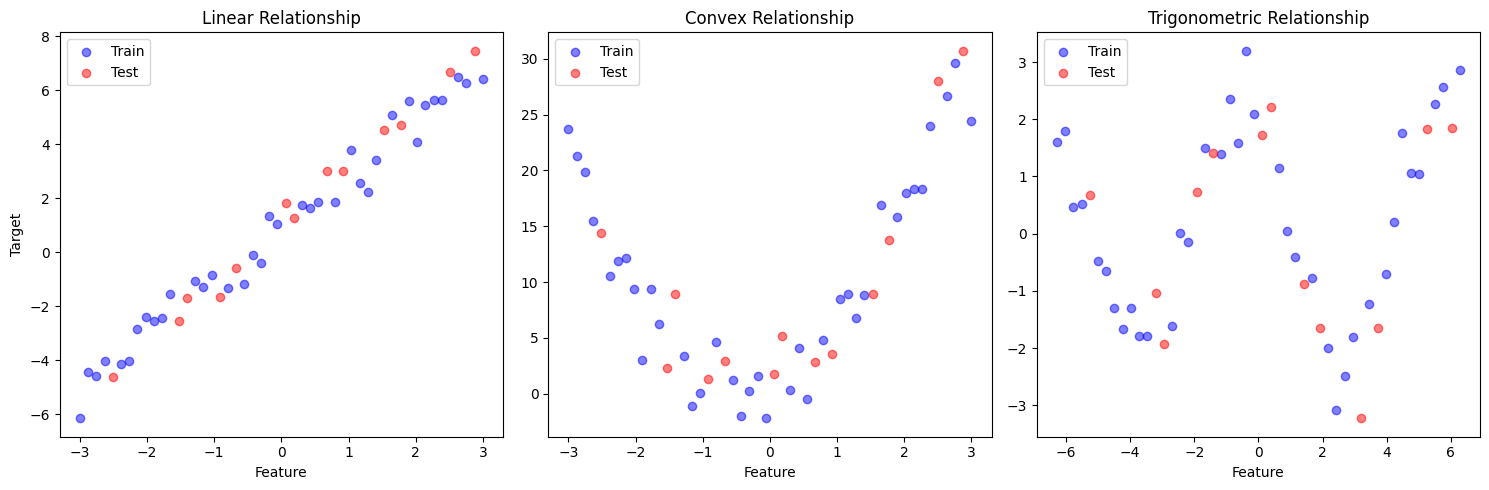

In [ ]:
# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the linear dataset
axes[0].scatter(X_linear_train, Y_linear_train, color='blue', label='Train', alpha=0.5)
axes[0].scatter(X_linear_test, Y_linear_test, color='red', label='Test', alpha=0.5)
axes[0].set_title('Linear Relationship')
axes[0].set_xlabel('Feature')
axes[0].set_ylabel('Target')
axes[0].legend()

# Plot the convex dataset
axes[1].scatter(X_convex_train, Y_convex_train, color='blue', label='Train', alpha=0.5)
axes[1].scatter(X_convex_test, Y_convex_test, color='red', label='Test', alpha=0.5)
axes[1].set_title('Convex Relationship')
axes[1].set_xlabel('Feature')
axes[1].legend()

# Plot the trigonometric dataset
axes[2].scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
axes[2].scatter(X_tri_test, Y_tri_test, color='red', label='Test', alpha=0.5)
axes[2].set_title('Trigonometric Relationship')
axes[2].set_xlabel('Feature')
axes[2].legend()

plt.tight_layout()
plt.show()

##### 1.2. Linear Regression: Fit a line for the given dataset (2 pts)

TASK: **Fit a line for each of the 3 datasets!**

*Instructions:* You must fit on the training data and then do predictions for both the training and test sets. Use the training prediction for plotting, and the test prediction for evaluation.

*Hint: You can use LinearRegssion from sklearn.linear_model*

In [ ]:
# Re-import the necessary module for LinearRegression
from sklearn.linear_model import LinearRegression

##### Instruction: You have to estimate Y_*_train_pred and Y_*_test_pred for each dataset.
##### Your Code Below
linear_model = LinearRegression()
convex_model = LinearRegression()
tri_model = LinearRegression()

linear_model.fit(X_linear_train, Y_linear_train)
convex_model.fit(X_convex_train, Y_convex_train)
tri_model.fit(X_tri_train, Y_tri_train)

Y_linear_train_pred = linear_model.predict(X_linear_train)
Y_convex_train_pred = convex_model.predict(X_convex_train)
Y_tri_train_pred = tri_model.predict(X_tri_train)

Y_linear_test_pred = linear_model.predict(X_linear_test)
Y_convex_test_pred = convex_model.predict(X_convex_test)
Y_tri_test_pred = tri_model.predict(X_tri_test)

Plots below! We'll use the test predictions later.

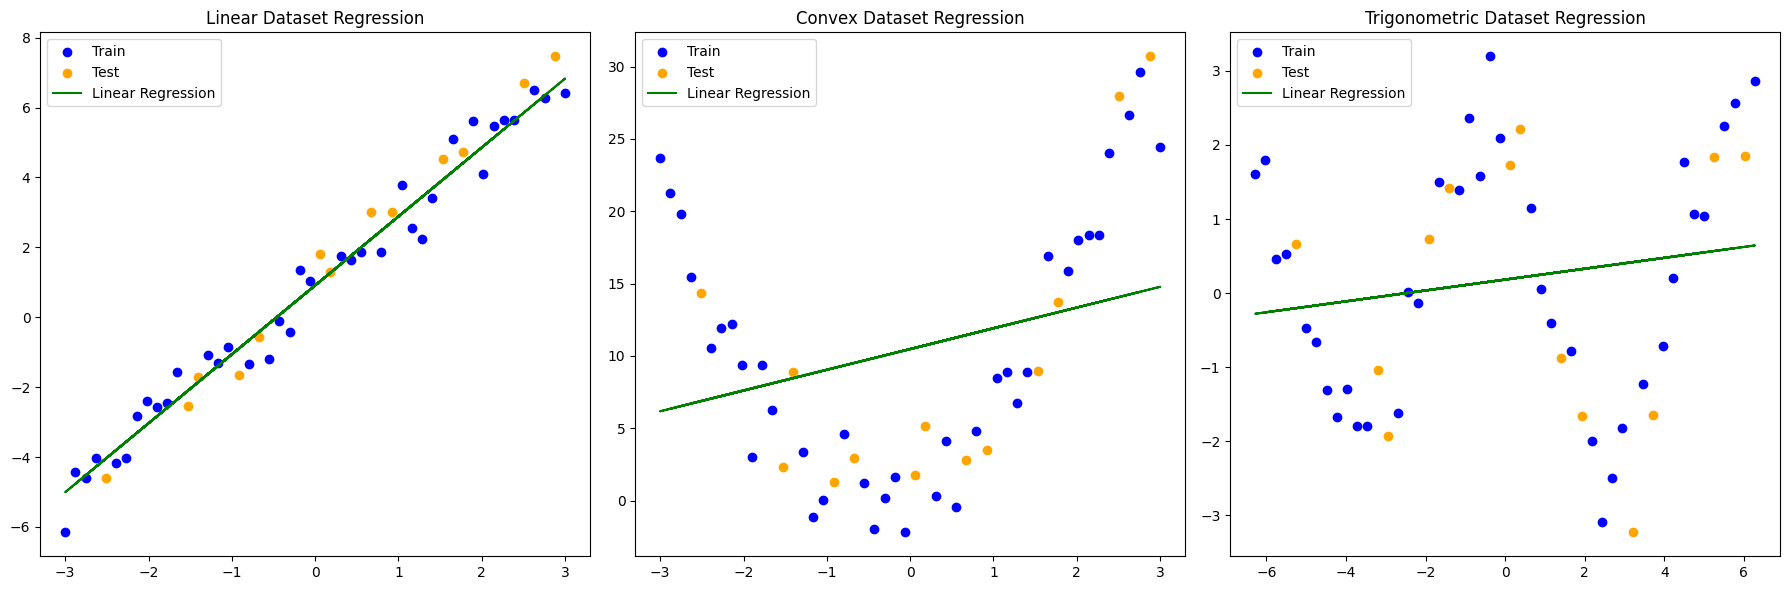

In [ ]:
# Plot the results along with the regression lines for each dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Linear dataset and model
axes[0].scatter(X_linear_train, Y_linear_train, color='blue', label='Train')
axes[0].scatter(X_linear_test, Y_linear_test, color='orange', label='Test')
axes[0].plot(X_linear_train, Y_linear_train_pred, color='green', label='Linear Regression')
axes[0].set_title('Linear Dataset Regression')
axes[0].legend()

# Convex dataset and model
axes[1].scatter(X_convex_train, Y_convex_train, color='blue', label='Train')
axes[1].scatter(X_convex_test, Y_convex_test, color='orange', label='Test')
axes[1].plot(X_convex_train, Y_convex_train_pred, color='green', label='Linear Regression')
axes[1].set_title('Convex Dataset Regression')
axes[1].legend()

# Trigonometric dataset and model
axes[2].scatter(X_tri_train, Y_tri_train, color='blue', label='Train')
axes[2].scatter(X_tri_test, Y_tri_test, color='orange', label='Test')
axes[2].plot(X_tri_train, Y_tri_train_pred, color='green', label='Linear Regression')
axes[2].set_title('Trigonometric Dataset Regression')
axes[2].legend()

plt.tight_layout()
plt.show()

##### 1.3. Linear Model Evaluation (2 pts)
TASK: Calculate the Mean Squared Error (MSE) and $R^2$ coefficient for each training and test spllit.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

##### Instruction: You have to estimate mse_*_train, mse_*_test, r2_*_train, r2_*_test
##### Your Code Below

# Calculate MSE and R^2 for the linear dataset
mse_linear_train = mean_squared_error(Y_linear_train, Y_linear_train_pred)
mse_linear_test = mean_squared_error(Y_linear_test, Y_linear_test_pred)
r2_linear_train = r2_score(Y_linear_train, Y_linear_train_pred)
r2_linear_test = r2_score(Y_linear_test, Y_linear_test_pred)

# Calculate MSE and R^2 for the convex dataset
mse_convex_train = mean_squared_error(Y_convex_train, Y_convex_train_pred)
mse_convex_test = mean_squared_error(Y_convex_test, Y_convex_test_pred)
r2_convex_train = r2_score(Y_convex_train, Y_convex_train_pred)
r2_convex_test = r2_score(Y_convex_test, Y_convex_test_pred)

# Calculate MSE and R^2 for the trigonometric dataset
mse_tri_train = mean_squared_error(Y_tri_train, Y_tri_train_pred)
mse_tri_test = mean_squared_error(Y_tri_test, Y_tri_test_pred)
r2_tri_train = r2_score(Y_tri_train, Y_tri_train_pred)
r2_tri_test = r2_score(Y_tri_test, Y_tri_test_pred)

In [ ]:
# Organize the results into a structured format
results = {
    "Linear": {
        "MSE Train": mse_linear_train,
        "MSE Test": mse_linear_test,
        "R2 Train": r2_linear_train,
        "R2 Test": r2_linear_test
    },
    "Convex": {
        "MSE Train": mse_convex_train,
        "MSE Test": mse_convex_test,
        "R2 Train": r2_convex_train,
        "R2 Test": r2_convex_test
    },
    "Trigonometric": {
        "MSE Train": mse_tri_train,
        "MSE Test": mse_tri_test,
        "R2 Train": r2_tri_train,
        "R2 Test": r2_tri_test
    }
}

# Print the results
for dataset, metrics in results.items():
    print(f"{dataset} Dataset:")
    print(f"  MSE Train: {metrics['MSE Train']:.4f}")
    print(f"  MSE Test: {metrics['MSE Test']:.4f}")
    print(f"  R2 Train: {metrics['R2 Train']:.4f}")
    print(f"  R2 Test: {metrics['R2 Test']:.4f}")
    print()  # Add a blank line for better readability

Linear Dataset:
  MSE Train: 0.3355
  MSE Test: 0.3347
  R2 Train: 0.9746
  R2 Test: 0.9736

Convex Dataset:
  MSE Train: 73.5045
  MSE Test: 70.3537
  R2 Train: 0.0847
  R2 Test: 0.2073

Trigonometric Dataset:
  MSE Train: 2.6367
  MSE Test: 3.0815
  R2 Train: 0.0288
  R2 Test: -0.0242



##### 1.4. Discussion about the Evaluation Results. (2 pts)

TASK: Answer following questions:

- Does our model working well for each dataset? Explain based on the calculated metrics above.
- Explain what $R^2$ coefficient is. Discuss what it indicates about a model's performance when $R^2 =0 $ and $R^2 = 1$

No, the model only works well for the linear dataset, the rest is way off. The lower the MSE score the better, and higher R2 score the better.  Linear dataset is signifigantly better in these aspects.  The R2 coefficent is how well the data fits the model from 0 being the worst to 1 being the best.  0 is not fitting at all, 1 is a perfect fit.  The linear dataset has an R2 score of .98, almost perfect.  

##### 1.5. Implement Polynomial Features (2 pts)


> In this section, we'll explore how to use polynomial features to transform non-linear relationships into linear ones, enabling us to apply linear regression effectively.



If we could project ourselves into a dimension where non-linear relationships **become** linear, we could do linear regression! Let's try that now with polynomial features.


You can think of these features like this...

Consider this: a relationship like $y = x^2$ is non-linear. However, if we introduce a new variable $\alpha = x^2$, our equation becomes $y = \alpha$. Now, when we plot $y$ against $\alpha$, we'll observe a linear relationship!

* $ y = x^2$ is non linear right?
* What if we said $\alpha = x^2$, so $y = \alpha$?
*Then if you plot $y$ versus $\alpha$ you would get a linear relationship!


We recommend using the sklearn ['make_pipeline'](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) and ['PolynomialFeatures'](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) for this part.

TASK: Given the provided code below, your task is to implement polynomial regression models for three distinct datasets: linear, convex, and trigonometric to predict outcomes for both training and test data for each dataset :

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define degrees for polynomial features
degree_linear = 1  # For the linear dataset, a degree of 1 is just a linear relationship
degree_convex = 3  # For the convex dataset, let's try a quadratic model
degree_tri = 10  # For the trigonometric dataset, a higher degree might capture the sine/cosine waves

##### Instruction: You have to estimate Y_*_train_pred_poly and Y_*_test_pred_poly
##### Your Code Below

lin_pipe =  make_pipeline(PolynomialFeatures(degree = degree_linear), LinearRegression())
lin_pipe.fit(X_linear_train, Y_linear_train)
conv_pipe =  make_pipeline(PolynomialFeatures(degree = degree_convex), LinearRegression())
conv_pipe.fit(X_convex_train, Y_convex_train)
tri_pipe =  make_pipeline(PolynomialFeatures(degree = degree_tri), LinearRegression())
tri_pipe.fit(X_tri_train, Y_tri_train)

# Predict on the training data to plot the regression lines
Y_linear_train_pred_poly = lin_pipe.predict(X_linear_train)
Y_convex_train_pred_poly = conv_pipe.predict(X_convex_train)
Y_tri_train_pred_poly = tri_pipe.predict(X_tri_train)

# Predict on the test data for evaluation
Y_linear_test_pred_poly = lin_pipe.predict(X_linear_test)
Y_convex_test_pred_poly = conv_pipe.predict(X_convex_test)
Y_tri_test_pred_poly = tri_pipe.predict(X_tri_test)

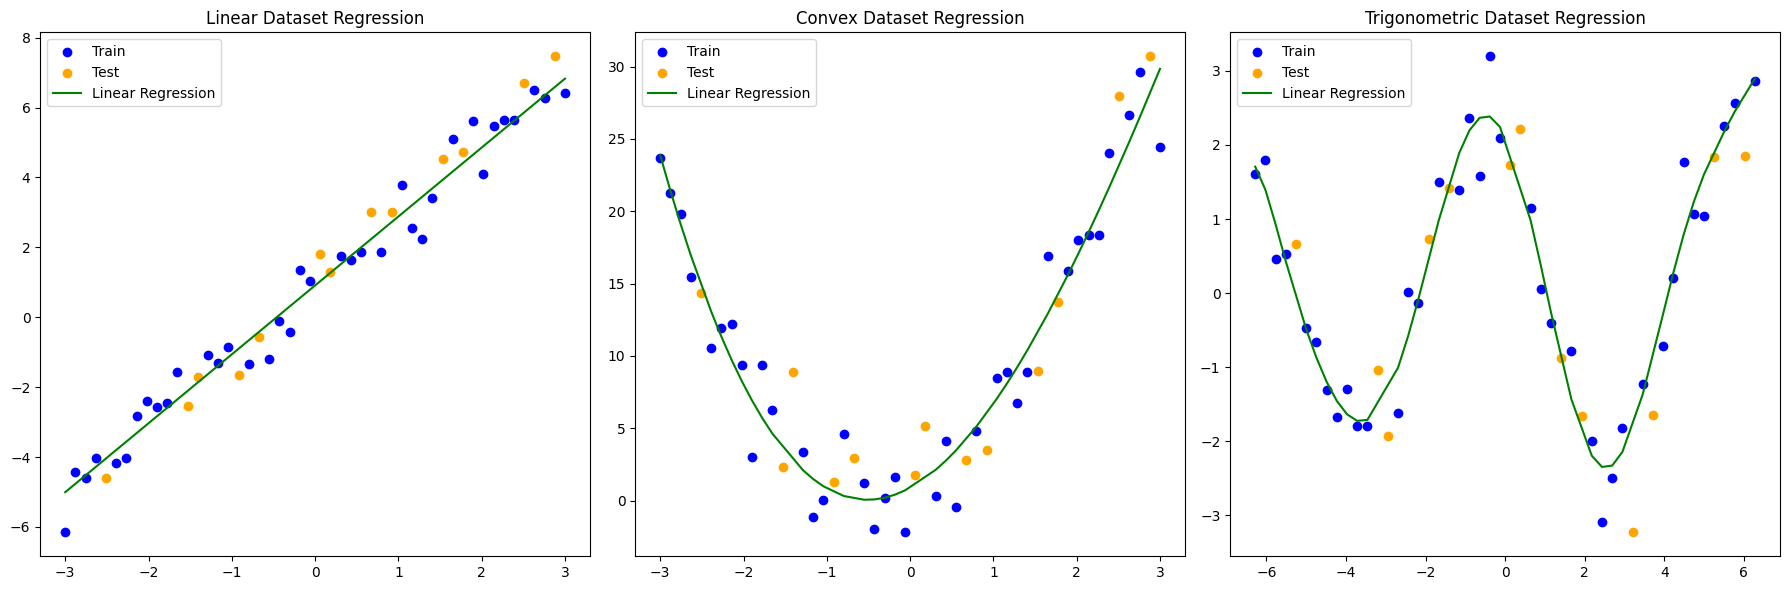

In [ ]:
# Plot the results along with the regression lines for each dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Prepare sorted X values for plotting polynomial regression lines
X_linear_train_sorted_idx = np.argsort(X_linear_train.ravel())
X_convex_train_sorted_idx = np.argsort(X_convex_train.ravel())
X_tri_train_sorted_idx = np.argsort(X_tri_train.ravel())

# Linear dataset and model
axes[0].scatter(X_linear_train, Y_linear_train, color='blue', label='Train')
axes[0].scatter(X_linear_test, Y_linear_test, color='orange', label='Test')
axes[0].plot(X_linear_train[X_linear_train_sorted_idx], Y_linear_train_pred_poly[X_linear_train_sorted_idx], color='green', label='Linear Regression')
axes[0].set_title('Linear Dataset Regression')
axes[0].legend()

# Convex dataset and model
axes[1].scatter(X_convex_train, Y_convex_train, color='blue', label='Train')
axes[1].scatter(X_convex_test, Y_convex_test, color='orange', label='Test')
axes[1].plot(X_convex_train[X_convex_train_sorted_idx], Y_convex_train_pred_poly[X_convex_train_sorted_idx], color='green', label='Linear Regression')
axes[1].set_title('Convex Dataset Regression')
axes[1].legend()

# Trigonometric dataset and model
axes[2].scatter(X_tri_train, Y_tri_train, color='blue', label='Train')
axes[2].scatter(X_tri_test, Y_tri_test, color='orange', label='Test')
axes[2].plot(X_tri_train[X_tri_train_sorted_idx], Y_tri_train_pred_poly[X_tri_train_sorted_idx], color='green', label='Linear Regression')
axes[2].set_title('Trigonometric Dataset Regression')
axes[2].legend()

plt.tight_layout()
plt.show()

TASK: Next, you now have to calculate the Mean Squared Error (MSE) and R-squared ($R^2$) scores for both the training and test data for each polynomial regression model.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

##### Instruction: You have to estimate mse_*_test_poly, r2_*_test_poly, mse_*_train_poly, r2_*_train_poly
##### Your Code Below
mse_linear_test_poly = mean_squared_error(Y_linear_test, Y_linear_test_pred_poly)
r2_linear_test_poly = r2_score(Y_linear_test, Y_linear_test_pred_poly)

mse_convex_test_poly = mean_squared_error(Y_convex_test, Y_convex_test_pred_poly)
r2_convex_test_poly = r2_score(Y_convex_test, Y_convex_test_pred_poly)

mse_tri_test_poly = mean_squared_error(Y_tri_test, Y_tri_test_pred_poly)
r2_tri_test_poly = r2_score(Y_tri_test, Y_tri_test_pred_poly)

# Calculate MSE and R^2 for the training data for each polynomial model
mse_linear_train_poly = mean_squared_error(Y_linear_train, Y_linear_train_pred_poly)
r2_linear_train_poly = r2_score(Y_linear_train, Y_linear_train_pred_poly)

mse_convex_train_poly = mean_squared_error(Y_convex_train, Y_convex_train_pred_poly)
r2_convex_train_poly = r2_score(Y_convex_train, Y_convex_train_pred_poly)

mse_tri_train_poly = mean_squared_error(Y_tri_train, Y_tri_train_pred_poly)
r2_tri_train_poly = r2_score(Y_tri_train, Y_tri_train_pred_poly)


In [ ]:
# Print the MSE and R^2 values for both training and testing sets for each dataset with polynomial features
print("Linear Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_linear_train_poly:.4f}, R^2: {r2_linear_train_poly:.4f}")
print(f"Test - MSE: {mse_linear_test_poly:.4f}, R^2: {r2_linear_test_poly:.4f}\n")

print("Convex Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_convex_train_poly:.4f}, R^2: {r2_convex_train_poly:.4f}")
print(f"Test - MSE: {mse_convex_test_poly:.4f}, R^2: {r2_convex_test_poly:.4f}\n")

print("Trigonometric Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_tri_train_poly:.4f}, R^2: {r2_tri_train_poly:.4f}")
print(f"Test - MSE: {mse_tri_test_poly:.4f}, R^2: {r2_tri_test_poly:.4f}\n")

Linear Dataset with Polynomial Features:
Train - MSE: 0.3355, R^2: 0.9746
Test - MSE: 0.3347, R^2: 0.9736

Convex Dataset with Polynomial Features:
Train - MSE: 5.1623, R^2: 0.9357
Test - MSE: 8.2007, R^2: 0.9076

Trigonometric Dataset with Polynomial Features:
Train - MSE: 0.1629, R^2: 0.9400
Test - MSE: 0.4017, R^2: 0.8665



##### 1.6. Discussion about the Evaluation Results. (2 pts)

TASK: Answer following questions:
- Does our model working well for each dataset? Explain based on the calculated metrics above.
- Let's play a little bit with degree_linear, degree_convex, degree_tri. Is is always beneficial to use higher-order degree features? What is the difference of underfitting and overfitting?

Our models work somewhat for each dataset.  Both linear and tri datasets have very low MSE, and every dataset has pretty high R2 scores.  The only problem is with the MSE of convex.  The data for convex varies a lot, so the line seems good but the MSE is still high.  
No, it's not always beneficial to use higher-order degree features.  This is because if you put more degrees than needed, it will overfit the model and will do good on the trained data, and bad on unseen test data.  For underfitting with too little degrees, it will do bad in both datasets since the linear regression line is not similar to the data spread.

##### 1.7. Ridge/Lasso Regression (3 pts)



> We've talked about overfitting/underfittingWe've in Machine Learning. One effective approach to address these issues is through the use of **regularization** methods or techniques.  These techniques introduce additional constraints or penalties to the optimization process, encouraging the development of simpler models that are less prone to overfitting. These constraints are usually applied to the model parameters during training, influencing their values to prevent them from becoming excessively large.

> Two common types of regularization used in regression are 'ridge' and 'lasso' regression. (technically, this involves adding an L1 or L2 term to the loss used for optimization... but this is a technicality).






Some interesting notes on the material...

- Interesting Material : https://medium.com/@tavishi.1402/regularization-techniques-lasso-and-ridge-90d3cc73ca4c

- https://medium.com/@nerdjock/lesson-18-machine-learning-regularization-techniques-l1-lasso-and-l2-ridge-regularization-b9dc312c71fe

- https://www.linkedin.com/pulse/regularization-l1lasso-l2ridge-mukesh-manral/?trk=pulse-article


- Lasso regression is interesting because it theoretically can perform linear regression in **feature space**. I.e. it theoretically can learn how to *linearly* separate transformations of the data that maximize the information gain from the raw data.


TASK: Your task is to implement both Ridge and Lasso regression and compare their performances. Determine, do they perform the same? If one is better than the other one, why do you think so..? **Back up your answers!!**



Additionally, implement **ElasticNet**, which combines elements of both Ridge and Lasso regression.

**All these modules can be found in sklearn.linear_model**


In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

### DO NOT MODIFY
# Define a high degree for polynomial features for the trigonometric dataset
degree = 20

# Regularization strength for Ridge, Lasso, and ElasticNet
alpha_value = 0.01
### DO NOT MODIFY

##### Instruction: You have to define model_default, model_lasso, model_ridge, model_elastic
##### Your Code Below
model_default = make_pipeline(PolynomialFeatures(degree = degree), LinearRegression())
model_lasso = make_pipeline(PolynomialFeatures(degree = degree), Lasso(alpha = alpha_value))
model_ridge = make_pipeline(PolynomialFeatures(degree = degree), Ridge(alpha = alpha_value))
model_elastic = make_pipeline(PolynomialFeatures(degree = degree), ElasticNet(alpha = alpha_value))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.182e+00, tolerance: 1.004e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.6148e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.979e+00, tolerance: 1.004e-02
  model = cd_fast.enet_coordinate_descent(


MSE AND R2 FOR TRI TRAINING DATASET:
MSE for Lasso: 0.24799107814886048
R2 for Lasso: 0.908652931664924
MSE for Ridge: 0.09931143306187494
R2 for Ridge: 0.9634188119585821


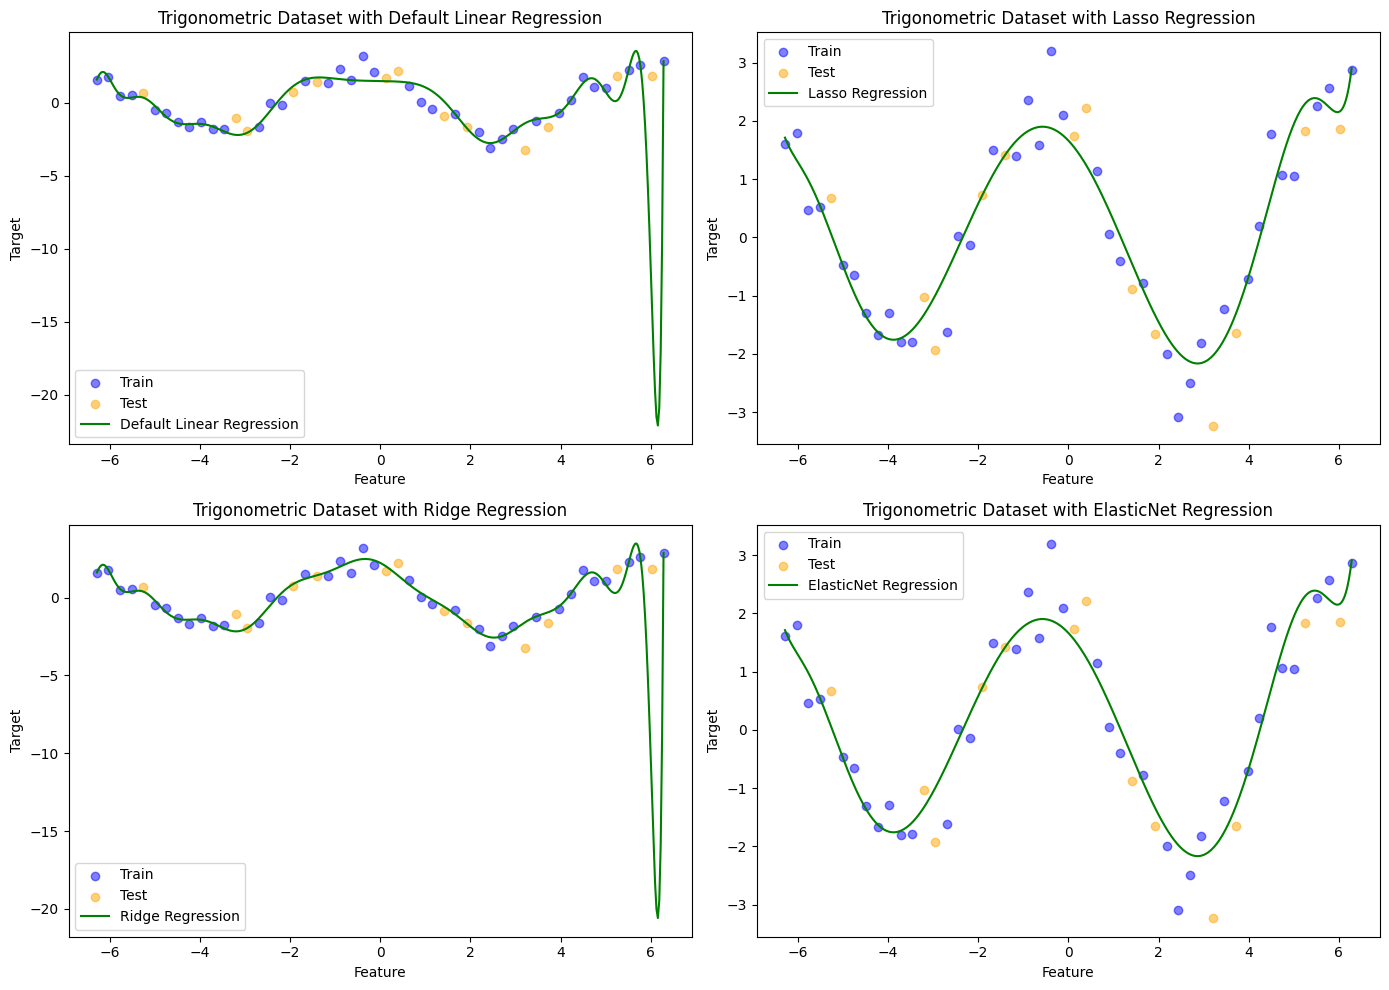

In [ ]:
# Fit the models to the trigonometric training data
model_default.fit(X_tri_train, Y_tri_train)
model_lasso.fit(X_tri_train, Y_tri_train)
model_ridge.fit(X_tri_train, Y_tri_train)
model_elastic.fit(X_tri_train, Y_tri_train)

# Generate a dense grid for plotting
X_tri_dense = np.linspace(X_tri_train.min(), X_tri_train.max(), 400).reshape(-1, 1)

# Predict on the dense grid for smooth plotting
Y_tri_dense_pred_default = model_default.predict(X_tri_dense)
Y_tri_dense_pred_lasso = model_lasso.predict(X_tri_dense)
Y_tri_dense_pred_ridge = model_ridge.predict(X_tri_dense)
Y_tri_dense_pred_elastic = model_elastic.predict(X_tri_dense)

# Predict lasso & ridge on regular tri dataset so we can compare MSE and R2
Y_tri_lasso = model_lasso.predict(X_tri_train)
Y_tri_ridge = model_ridge.predict(X_tri_train)
# Print MSE and R2
print("MSE AND R2 FOR TRI TRAINING DATASET:")
print("MSE for Lasso:", mean_squared_error(Y_tri_train, Y_tri_lasso))
print("R2 for Lasso:", r2_score(Y_tri_train, Y_tri_lasso))
print("MSE for Ridge:", mean_squared_error(Y_tri_train, Y_tri_ridge))
print("R2 for Ridge:", r2_score(Y_tri_train, Y_tri_ridge))

# Plot the results along with the regression lines for the trigonometric dataset
plt.figure(figsize=(14, 10))

# Default Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
plt.scatter(X_tri_test, Y_tri_test, color='orange', label='Test', alpha=0.5)
plt.plot(X_tri_dense, Y_tri_dense_pred_default, color='green', label='Default Linear Regression')
plt.title('Trigonometric Dataset with Default Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Lasso Regression
plt.subplot(2, 2, 2)
plt.scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
plt.scatter(X_tri_test, Y_tri_test, color='orange', label='Test', alpha=0.5)
plt.plot(X_tri_dense, Y_tri_dense_pred_lasso, color='green', label='Lasso Regression')
plt.title('Trigonometric Dataset with Lasso Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Ridge Regression
plt.subplot(2, 2, 3)
plt.scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
plt.scatter(X_tri_test, Y_tri_test, color='orange', label='Test', alpha=0.5)
plt.plot(X_tri_dense, Y_tri_dense_pred_ridge, color='green', label='Ridge Regression')
plt.title('Trigonometric Dataset with Ridge Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# ElasticNet Regression
plt.subplot(2, 2, 4)
plt.scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
plt.scatter(X_tri_test, Y_tri_test, color='orange', label='Test', alpha=0.5)
plt.plot(X_tri_dense, Y_tri_dense_pred_elastic, color='green', label='ElasticNet Regression')
plt.title('Trigonometric Dataset with ElasticNet Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

I belive that Ridge is slightly better in this instance, but the performance is comparable.  

MSE for Lasso: 0.28968698465723447

R2 for Lasso: 0.884959723488991

MSE for Ridge: 0.17552006844233264

R2 for Ridge: 0.9302976030119933

For this data, Ridge had both lower MSE and higher R2 compared to Lasso.  The results are enough to say that Ridge is better with this dataset, but Lasso was not too far behind.  



### Section 2: Linear Regression Model Design (15 points)

The mean-squared error loss is one of the basic loss that can be used for linear regression.

$$L_\text{MSE} = \frac{1}{n}\sum_{i=1}^n(\hat{Y}_i - Y_i)^2$$
$$\hat{Y}_i = \theta_1 X_i + \theta_2$$

Reminder: $\frac{\partial f}{\partial x}$ means taking the derivative of $f$ with respect to $x$, assuming ALL other variables are constants.

Sources:

https://tutorial.math.lamar.edu/classes/calciii/partialderivatives.aspx

https://tutorial.math.lamar.edu/classes/calci/DerivativeIntro.aspx



##### 2.1. Derive the gradients $\frac{\partial L}{\partial\theta_1}, \frac{\partial L}{\partial\theta_2}$ (3 pts).

To derive, substitute in $\hat{Y}_i$ into the equation and do the chain rule.

$\frac{\partial L}{\partial\theta_1}$ = $\frac{2}{n}\sum_{i=1}^nX_i(\theta_1 X_i + \theta_2 - Y_i)$  =  $\frac{-2}{n}\sum_{i=1}^nX_i( Y_i - (\theta_1 X_i + \theta_2))$

$\frac{\partial L}{\partial\theta_2}$ =  $\frac{2}{n}\sum_{i=1}^n(\theta_1 X_i + \theta_2 - Y_i)$ = $\frac{-2}{n}\sum_{i=1}^n(Y_i - (\theta_1 X_i + \theta_2))$



##### 2.2 Implement our SimpleLinearRegression class (8 pts)





TASK: Your task is to complete the implementation of a Simple Linear Regression model using gradient descent from scratch.

You may have to follow these steps: <br>

* Initialize model parameters.
* Implement gradient descent to iteratively update the model parameters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        # Your code here. Initialize m and b
        self.m = 0
        self.b = 0


    def fit(self, X, Y):
        # Your code here. Perform gradient descent
        n = len(X)
        for _ in range(self.iterations):
            y_pred = self.m * X + self.b
            # formulas we derived
            dm = (-2/n) * np.sum(X * (Y - y_pred))
            db = (-2/n) * np.sum(Y - y_pred)
            self.m -= self.learning_rate * dm
            self.b -= self.learning_rate * db

    def predict(self, X):
        return self.m * X + self.b

    def plot_regression_line(self, X, Y):
        # Predict values
        Y_pred = self.predict(X)

        # Plotting the regression line and the data points
        # Plot your predictions on X.
        plt.scatter(X, Y, color='blue', label='Actual data')
        plt.plot(X, Y_pred, color='red', label='Fitted line')
        plt.title('Linear Regression Using Gradient Descent')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()

The following code will test your implementation.

In [ ]:
### DO NOT MODIFY
def test_linear_regression(model, X, Y):
    model.fit(X, Y)
    predictions = model.predict(X)

    relative_error = np.mean(np.abs((Y - predictions) / (Y + 1e-8)))
    return relative_error < 0.02

test_datasets = [
    (np.array([1, 2, 3, 4, 5]), np.array([2, 4, 6, 8, 10])),
    (np.array([1, 2, 3, 4, 5]), np.array([1, 4, 9, 16, 25])),
    (np.array([0, 0, 1, 1]), np.array([0, 1, 1, 0]))
]

# Initialize the model
model = SimpleLinearRegression(learning_rate=0.001, iterations=5000)


# Test each dataset
results = [test_linear_regression(model, X, Y) for X,Y in test_datasets]
answers = [True, False, False]
if results == answers:
  print("Good job!")
else:
  print("Wrong Implmentation! Your linear regression model needs more testing!")
  assert(False)

### DO NOT MODIFY

Good job!


##### 2.3 Train your model (4 pts)
TASK:
- Train your *SimpleLinearRegression* model
- Visualize the data (*You can use "plot_regression_line"*)

The following code will visualize your regression results. Use the model to **predict the scores for studying 1.5 hours and 3.5 hours**.

Prediction for 1.5 hours studied:  53.24908416556098 
Prediction for 3.5 hours studied:  69.44573620481846 



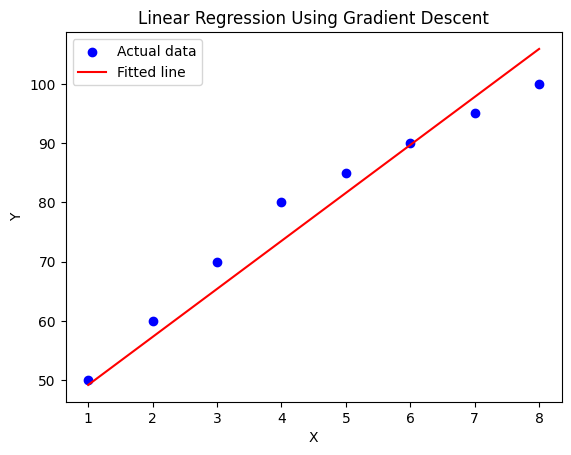

In [ ]:
### DO NOT MODIFY
# Given dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8])  # Hours Studied
Y = np.array([50, 60, 70, 80, 85, 90, 95, 100])  # Test Score

X_test = np.array([1.5, 3.5])
### DO NOT MODIFY

##### Your code below
model = SimpleLinearRegression(learning_rate=0.001, iterations=5000)
model.fit(X, Y)
test_pred = model.predict(X_test)
print("Prediction for 1.5 hours studied: ", test_pred[0], "\nPrediction for 3.5 hours studied: ", test_pred[1], "\n")
model.plot_regression_line(X, Y)

# Section 3 : Can Regression do Classification? (15 points)
Starting at the beginning, linear models are the simplest type of model possible. They imply that our data, when graphed in a mathematical basis, can be separated by a curve that is a line (in 2 dimensions), a plane (in 3 dimensions), or a hyperplane (> 3 dimensions).


What about using what we've done for classification? Can we apply our newfound regression skills to classify things? Let's try! You already have a lot of knowledge about classification, so some of the basics from the last homework will not be repeated.

Consider the following plot

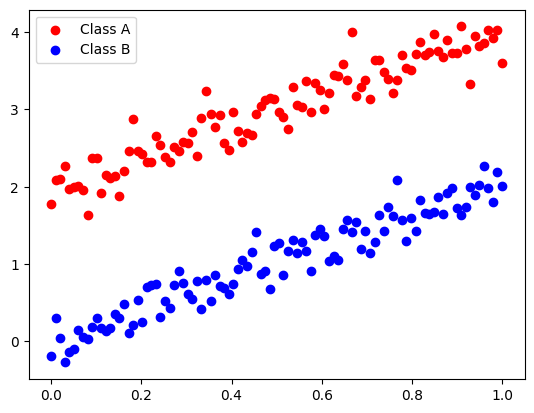

In [ ]:
# # # DO NOT MODIFY # # #
x_axis = np.linspace(0, 1, 100)
class_a = 2 * x_axis + 1 + np.random.normal(1, 0.2, x_axis.shape[0])
class_b = 2 * x_axis + 1 + np.random.normal(-1, 0.2, x_axis.shape[0])

plt.scatter(x_axis, class_a, color='r', label='Class A')
plt.scatter(x_axis, class_b, color='b', label='Class B')
plt.legend()

There is a very evident line that separates our classes here, one that we humans could easily draw by hand. Let's see if we can get a computer to find this for us!

### Question 1: GD Linear Classifier

We wish to create a function of the form

$$ g(x) = mx + b$$

where $m$ is the slope of a line, $b$ is a bias term, and $x$ is the function variable. But! More specifically, we want our output $f$ to be a 'class'... a binary choice (in the case of 2 classes). So instead we will define..

$$ f(x) = 1 \space\text{if}\space y > g(x) \space \text{else} \space 0$$

where a 1 represents class 'A', and 0 represents class 'B'.

So, we parameterize the curve like so...

$$ g(x) = \theta_1 x + \theta_2 $$

meaning I can define

$$g(x;\theta) = \theta_1 x + \theta_2$$

and $g$ in a similar fashion.

In theory, there exists at least one (we can draw it) line $g^* (x;\theta^*)$ that perfectly separates the data. The $^*$ represents 'optimal'.

The mathematically curious among you may choose to verify that there is a way to calculate the EXACTLY correct answer here, but for now we will choose to use an optimization technique to hone in on the correct values for $\theta_1, \theta_2$.

The optimization we will choose to use is standard gradient descent, where using the chain rule we can find the direction in which to optimize $\vec{\theta}$ such that we approach an optimal solution.

This means we will **start** by effectively training a linear regression model and using for classification. Just as a sneak peak ahead, what do you think might go wrong? (no need to answer, just think about it)

This is your data to use below. Do not modify it, just the variable names. **You should only access x_data_full and y_data_full in your code!!**

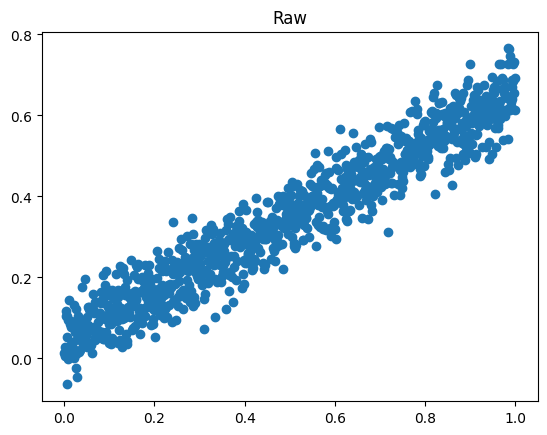

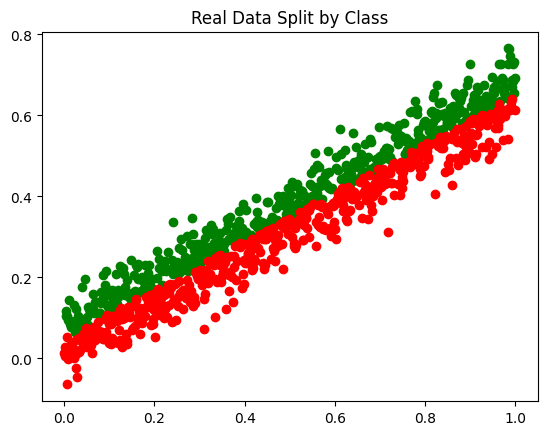

In [51]:
# # # DO NOT MODIFY # # #

m_star = 0.6
b_star = 0.05

x_data_full = np.linspace(0, 1, 1000)
y_data_full = m_star * x_data_full + b_star + np.random.normal(0, 0.05,
                                                          x_data_full.shape[0])
plt.scatter(x_data_full, y_data_full)
plt.title("Raw")
plt.show()

def calc(theta, x_data):
  return theta[0] * x_data + theta[1]

calced_values = calc([m_star, b_star], x_data_full)
true_x_a = []
true_x_b = []
true_y_a = []
true_y_b = []
for i in range(x_data_full.shape[0]):
  val = y_data_full[i]
  if val > calced_values[i]:
    true_x_a.append(x_data_full[i])
    true_y_a.append(y_data_full[i])
  else:
    true_x_b.append(x_data_full[i])
    true_y_b.append(y_data_full[i])

plt.scatter(true_x_a, true_y_a, color='g')
plt.scatter(true_x_b, true_y_b, color='r')
plt.title("Real Data Split by Class")
plt.show()

#### Part 1 (1 point)

TASK: Create a numpy vector for theta, randomize it below.** You may choose any method of randomly generating it you like **besides hardcoding the values!!**

In [45]:
# # # STUDENT INPUT # # #
# Place your answers here
theta = np.random.rand(2)

#### Part 2 (3 points)


TASK: **Plot the line** created by your theta and **color everything **that is classified correctly green, and everything incorrectly red.**

**Assume that everything above the line is class A, everything below is class B**

**HINT: It may be useful to create a function for this task in the future. Given a theta, and the dataset, highlight correct values.**

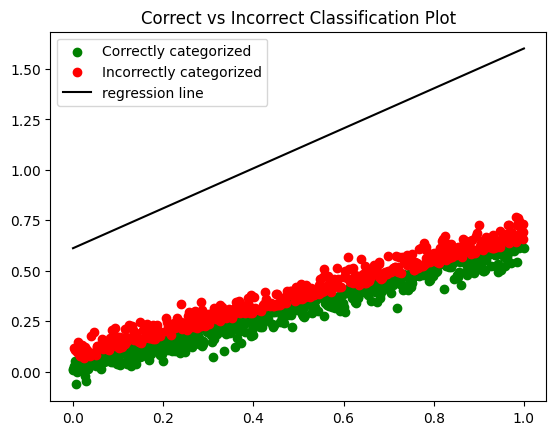

In [69]:
def calc(el, x_data):
  return el[0] * x_data + el[1]

def separate(x_data, y_data, el):
  calced_values = calc(el, x_data)

  true_x_a = []
  true_x_b = []
  true_y_a = []
  true_y_b = []
  for i in range(x_data.shape[0]):
    val = y_data[i]
    if val > calced_values[i]:
      true_x_a.append(x_data[i])
      true_y_a.append(y_data[i])
    else:
      true_x_b.append(x_data[i])
      true_y_b.append(y_data[i])

  return (true_x_a, true_y_a), (true_x_b, true_y_b)

# # # STUDENT INPUT # # #
# Place your answers here
def highlight(theta, x_data, y_data):
  # categorize data based on current theta
  over, under = separate(x_data, y_data, theta)
  x_vals = np.linspace(x_data.min(), x_data.max(), 100)
  y_vals = theta[0] * x_vals + theta[1]

  true_vals_x = []
  true_vals_y = []
  false_vals_x = []
  false_vals_y = []

  # see if data over the line is correct based off previous section
  for x, y in zip(over[0], over[1]):
    if x in true_x_a:
      true_vals_x.append(x)
      true_vals_y .append(y)
    else:
      false_vals_x.append(x)
      false_vals_y.append(y)

  # see if data under the line is correct based off previous section
  for x, y in zip(under[0], under[1]):
    if x in true_x_b:
      true_vals_x.append(x)
      true_vals_y.append(y)
    else:
      false_vals_x.append(x)
      false_vals_y.append(y)

  return true_vals_x, true_vals_y, false_vals_x, false_vals_y, x_vals, y_vals


true_vals_x, true_vals_y, false_vals_x, false_vals_y, x_vals, y_vals = highlight(theta, x_data_full, y_data_full)
plt.figure()
plt.scatter(true_vals_x, true_vals_y, color='g', label = "Correctly categorized")
plt.scatter(false_vals_x, false_vals_y, color='r', label = "Incorrectly categorized")
plt.plot(x_vals, y_vals, color = 'black', label = "regression line")
plt.title("Correct vs Incorrect Classification Plot")
plt.legend()
plt.show()


Way off!! Let's do some regression work now and get into the nitty gritty. This is just like what you did before.

#### Part 3: Write a function for the loss (1 point)

TASK: Define your loss function as the MSE loss.

In [ ]:
# # # STUDENT INPUT # # #
# Place your answers here

def mse_loss(true_values, predictions):
  squared = (true_values - predictions) ** 2
  mse = np.mean(squared)
  return mse

#### Part 4: Training Loop (5 points)

TASK: Now write the training loop...

1. Start with your initialized theta.
2. Fix the learning rate (we've fixed it for you)
3. Define the number of steps to run (we've fixed that too!)
4. For each step, perform a training step. Print the loss, **if you'd like**. **Do print the final loss**. **You have a simple linear regression model from earlier**
5. After the last step, graph your line and classify the points. If they're above your line, it's class A. If they're below, class B.
6. Graph your line, and the two classes as you drew them.
7. Compare your output to the real line that separates the classes. How far off were you? How many points did you miss?


MSE Score:  0.004313573933962828


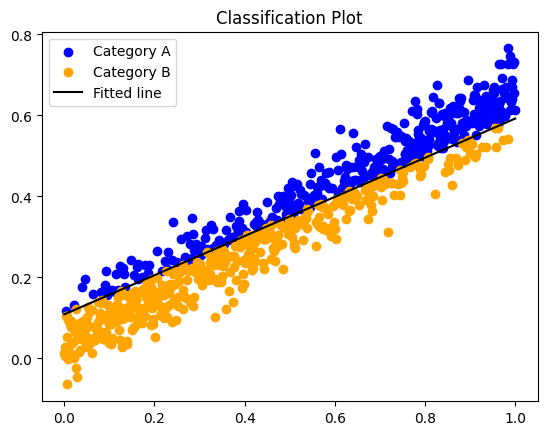

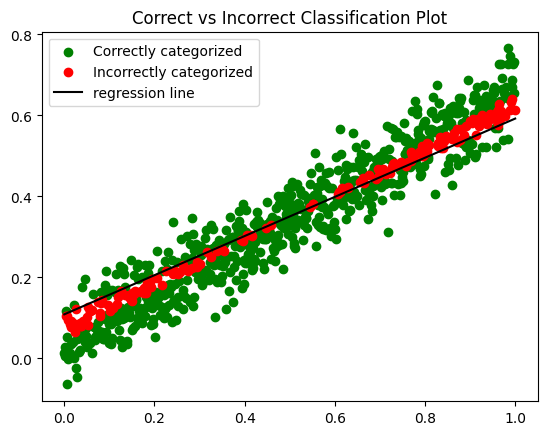

Number of Incorrect Categorized Points:  170


In [76]:
# # # STUDENT INPUT # # #
# Place your answers here

lr = 0.01 ### DO NOT CHANGE
num_steps = 1000 ### DO NOT CHANGE

# You can use SimpleLinearRegression here
x_train, x_test, y_train, y_test = train_test_split(x_data_full, y_data_full, test_size = 0.2, random_state = 42)
model = SimpleLinearRegression(learning_rate=lr, iterations=1)
for i in range(num_steps):
  model.fit(x_train, y_train)


test_pred = model.predict(x_test)

# print the final loss
print("MSE Score: ",mse_loss(y_test, test_pred))

# put theta as a list to use with plots
new_theta = [model.m, model.b]

# show categorized model
over, under = separate(x_train, y_train, new_theta)
x_vals = np.linspace(x_train.min(), x_train.max(), 100)
y_vals = new_theta[0] * x_vals + new_theta[1]
plt.figure()
plt.scatter(over[0], over[1], color='blue', label = "Category A")
plt.scatter(under[0], under[1], color='orange', label = "Category B")
plt.plot(x_vals, y_vals, color='black', label='Fitted line')
plt.title("Classification Plot")
plt.legend()
plt.show()

# show highlight plot
true_vals_x, true_vals_y, false_vals_x, false_vals_y, x_vals, y_vals = highlight(new_theta, x_train, y_train)
plt.figure()
plt.scatter(true_vals_x, true_vals_y, color='g', label = "Correctly categorized")
plt.scatter(false_vals_x, false_vals_y, color='r', label = "Incorrectly categorized")
plt.plot(x_vals, y_vals, color = 'black', label = "regression line")
plt.title("Correct vs Incorrect Classification Plot")
plt.legend()
plt.show()
print("Number of Incorrect Categorized Points: ", len(false_vals_x))


#### Part 5: What went wrong? (2 points)
In the textbox below, explain why you think this method of training the linear classifier from above Part 4 failed. Shouldn't it have worked? What lessons should you take away from this for doing machine learning in data science?


Try to write at least three sentences. The more you write here, the better, as the purpose of this question is to encourage ** deep thinking** about why our approach above didn't work. If you can support your work with math, that'll make your answer even stronger!!

I think my graph above is actually kind of decent with a MSE score of 0.004.  However, I believe this was just due to luck.  Linear Regression is used for continuous variables, and conforms to a pattern given by the datapoints.  Linear Regression is not used for classifying and there are better options that can optimize the seperation between classes more effectively and more accurately.  In conclusion, the objective of using Linear Regression is to predict continuous variables along a line, and will degrade the outcome of categorizing data when used because it is oblivious to categories in the form of binary (0 or 1 to a category), so it will not be a class but a y value.

### Handling More complicated data?

Excellent! We can classify data using a linear plane, and it's merely a mathematical exercise to extend this concept to higher dimensions.I.e. all the partials you computed earlier, now you just end up with more partial derivatives.

You have partial derivatives with each of the dimensions as you have a linear component in each of the dimensions.

Technically you also have 'y-intercepts' for each of the dimensions as well, but they can be combined into one constant term. This gives you $d+1$ weights to tune, where $d$ is the dimensionality of the X data.

But... what about this?

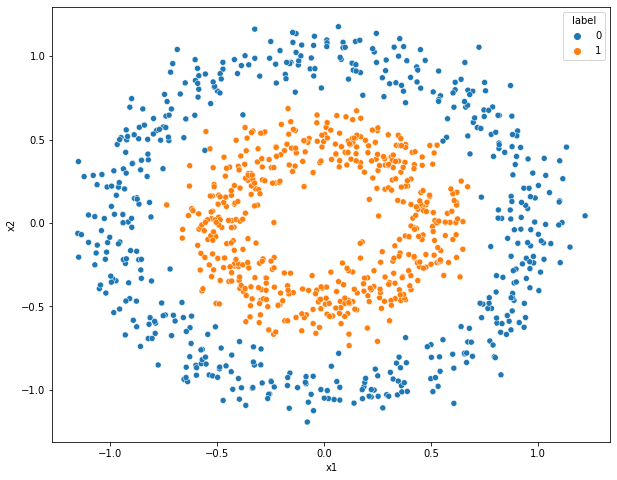

No good solution now...

What about this instead?

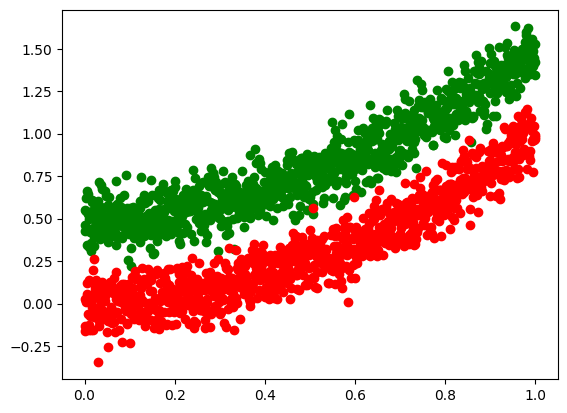

In [ ]:
y_data_full = x_data_full ** 2

class_a = x_data_full ** 2 + np.random.normal(0.5, 0.1, x_data_full.shape[0])
class_b = x_data_full ** 2 + np.random.normal(0, 0.1, x_data_full.shape[0])

plt.scatter(x_data_full, class_a, color='g')
plt.scatter(x_data_full, class_b, color='r')

No good. We can't separate data that looks like that. Not linearly anyway.

BUT! What if we redefine our basis? Instead of our y direction being linear in x, what if it was $x^2$?

Text(0.5, 0, 'x squared')

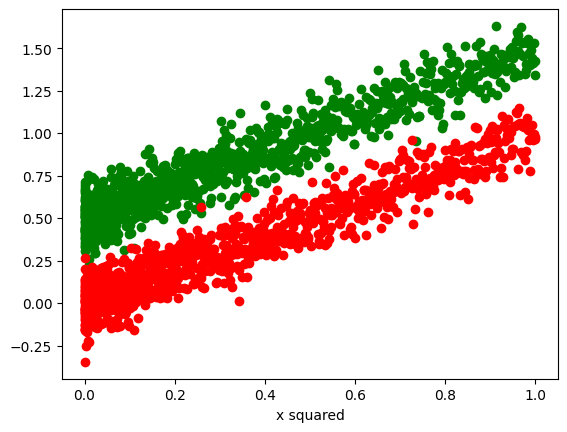

In [ ]:
x_squared = x_data_full ** 2

plt.scatter(x_squared, class_a, color='g')
plt.scatter(x_squared, class_b, color='r')

plt.xlabel('x squared')

Hey look! It's linear! What does this mean? By casting into higher dimensional spaces through a **kernel function**, we can linearly separate our data.

Of course we chose a very simple kernel.

But for more complex data there are a variety of kernels. Go look some up! **'Kernel trick SVM'** should give you plenty of great resources.




#### Part 6: List some different kernels you found online, their names. (3 points)


Gaussian kernel, Sigmoid kernel, and ANOVA radial basis kernel are some different kernels I found online.

#### Now, our final point is that **figuring out the kernel to use** is incredibly difficult, and effectively maps our data from raw $(x, y)$ space to some feature space $(\phi(x), \phi(y))$ as fixed by our kernel function.

To **learn** this feature space, instead of guess and check with kernel methods, we invented **neural networks**... and many other methods that perform **representation learning**. **THIS** is the power of neural networks.

### Final Section: Neural Networks (15 points)

In the final test, and meat of the homework, we want you to perform a real world regression all on your own. You know the fundamental underlying ideas, so let's use some real world libraries and methods to actually do regression on a **real** dataset.

We'll be using pytorch for this next section. Look at (https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/070179efc13bd796c5dd4af7bf52d5b9/intro.ipynb) for a run down on pytorch basics.

1. Import pytorch and sklearn, and use them to download the https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
2. Prepare a train and test dataset from the data. ONLY USE the TRAIN dataset for training!! Note that sklearn should do this for you.
3. Build a model in pytorch. Use the tutorials to help you.
4. Build the training loop! Train your network and share your results with us. Plot your loss curve over time.
5. Marvel at the multi-dimensional representation learning power of neural networks ! : )

You are free to use whatever hyperparameters or optimizer you prefer... though 'Adam' may be more powerful than the gradient descent you learned about in class.

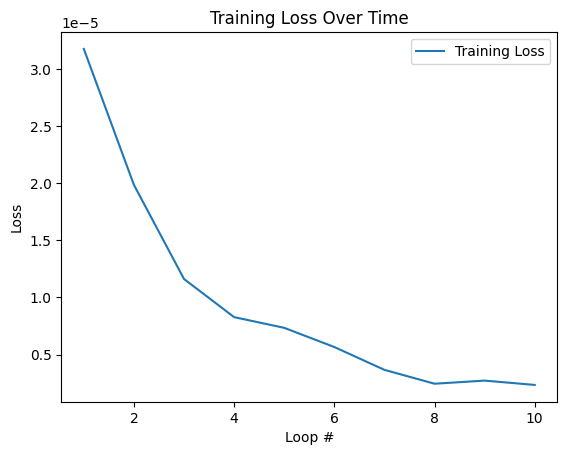

MSE of test data:  0.37148485
R2 score of test data:  0.6186882173903966


In [17]:
# # # Student response

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Your code below
lr = 0.001
loop = 10
hidden_size = 5

# StandardScalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# pytorch (convert into tensors)
X_train_tensor = torch.tensor(X_train).float()
X_test_tensor = torch.tensor(X_test).float()
y_train_tensor = torch.tensor(y_train).view(-1, 1).float()
y_test_tensor = torch.tensor(y_test).view(-1, 1).float()

# TensorDataset
training_dataset = TensorDataset(X_train_tensor, y_train_tensor)
testing_dataset =  TensorDataset(X_test_tensor, y_test_tensor)

# DataLoader
training_loader = DataLoader(training_dataset)
testing_loader = DataLoader(testing_dataset)

# nn (make the neural network)
class CaliModel(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(CaliModel, self).__init__()
    self.lin1 = nn.Linear(input_size, hidden_size)
    self.relU = nn.ReLU()
    self.lin2 = nn.Linear(hidden_size, 1)

  def forward(self, input):
    input = self.lin1(input)
    input = self.relU(input)
    input = self.lin2(input)
    return input


# initialize model
input_size = X_train.shape[1]
model = CaliModel(input_size,  hidden_size)

# MSE Loss
criterion = nn.MSELoss()

# optim
optimizer = optim.Adam(model.parameters(), lr = lr)

# loss array to graph later
loss_array = []

# train
model.train()
for i in range(loop):
  running_loss = 0.0
  for inputs, labels in training_loader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    running_loss += loss.item()
    optimizer.step()
  loss /= len(training_loader.dataset)
  loss_array.append(loss)


model.eval()
# Loss over time plot
# Gives "RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead" If not converted to tensor before plotting
loss_tensor = torch.tensor(loss_array).float()
plt.figure()
plt.plot(range(1, loop + 1), loss_tensor.detach().numpy(), label = "Training Loss")
plt.xlabel("Loop #")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.show()

# use the test data
outputs = model(X_test_tensor)
error = mean_squared_error(outputs.detach().numpy(), y_test_tensor.detach().numpy())
print("MSE of test data: ", error)
r2 = r2_score(outputs.detach().numpy(), y_test_tensor.detach().numpy())
print("R2 score of test data: ", r2)


## Bonus Question: Calculate the Exact Solution to the Linear Regressor (5 points)

Derive exact solution for $\theta$ when $$L = \frac{1}{N} (X \theta - y)^T (X \theta - y))$$

This is for multidimensional linear regression, and is the exact solution overall. Your answer should be the solution for $\theta$ that results in the **minimal value for the loss**. This is ideally the value that all gradient descent approaches would converge to during linear regression gradient descent.

**Student response here** (preferred latex, equation must be readable)